In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r"Housing processed.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

df = pd.read_csv(r"Housing processed.csv")

# Check for missing data
df.isnull().sum()

# Preprocessing: Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for both numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Apply preprocessing and create the transformed features
X = preprocessor.fit_transform(df)

# Assuming the target variable is 'SalePrice' (the housing prices)
y = df['price']


# Feature Selection (RandomForestRegressor)

In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Track column names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Recursive Feature Elimination (RFE)
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
X_selected_rfe = rfe.fit_transform(X, y)

# Get names of selected features
selected_features_rfe = feature_names[rfe.support_]  # Use rfe.support_ to filter the feature names

# Print selected feature names
print("Selected Features via RFE:", selected_features_rfe)


Selected Features via RFE: ['num__price' 'num__area' 'num__bedrooms' 'num__bathrooms' 'num__stories'
 'num__parking' 'cat__guestroom_no' 'cat__guestroom_yes'
 'cat__basement_no' 'cat__furnishingstatus_semi-furnished']


# Linear Dimensionality Reduction

# PCA

In [4]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

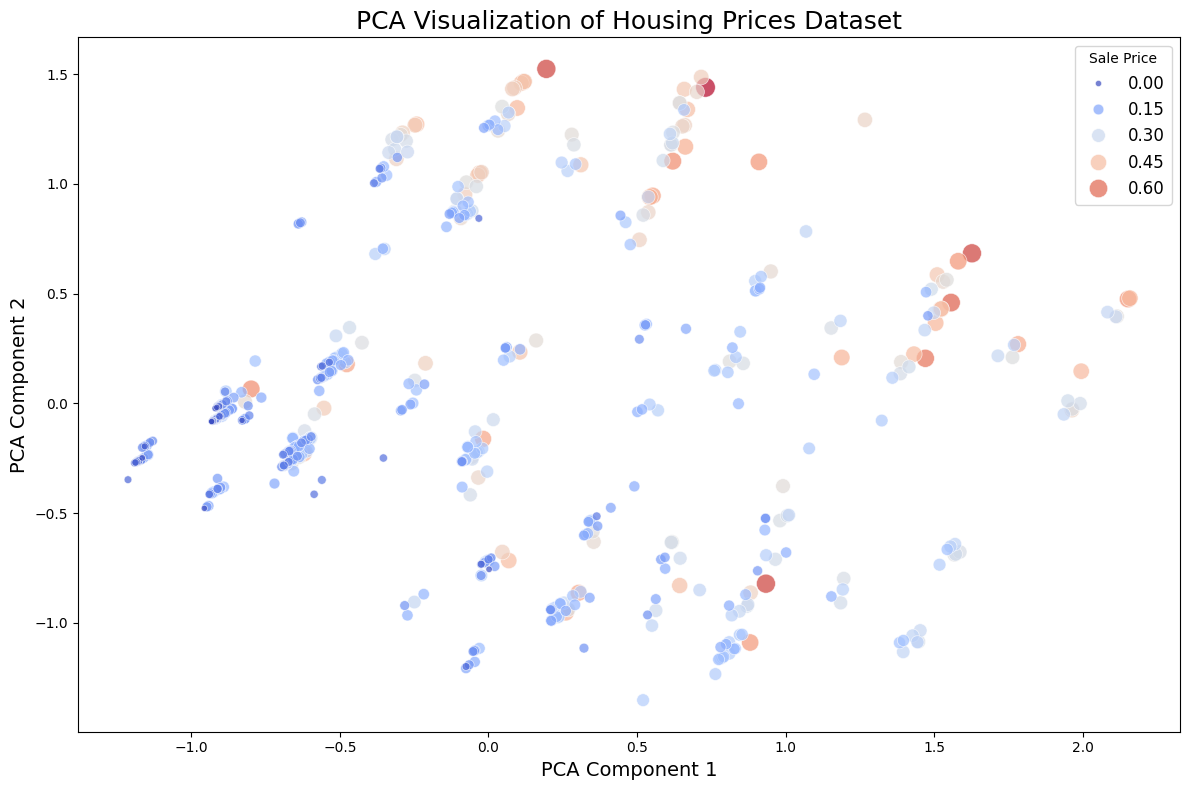

In [5]:
# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA_1', 'PCA_2'])
pca_df['SalePrice'] = df['price']

# Plot the PCA visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(
    data=pca_df,
    x='PCA_1',
    y='PCA_2',
    hue='SalePrice',
    palette='coolwarm',
    size='SalePrice',
    sizes=(20, 200),
    alpha=0.7,
    marker='o'
)

# Customize the plot
plt.title('PCA Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

# SVD

In [6]:
# Apply SVD
svd = TruncatedSVD(n_components=2, random_state=42)
svd_result = svd.fit_transform(X)

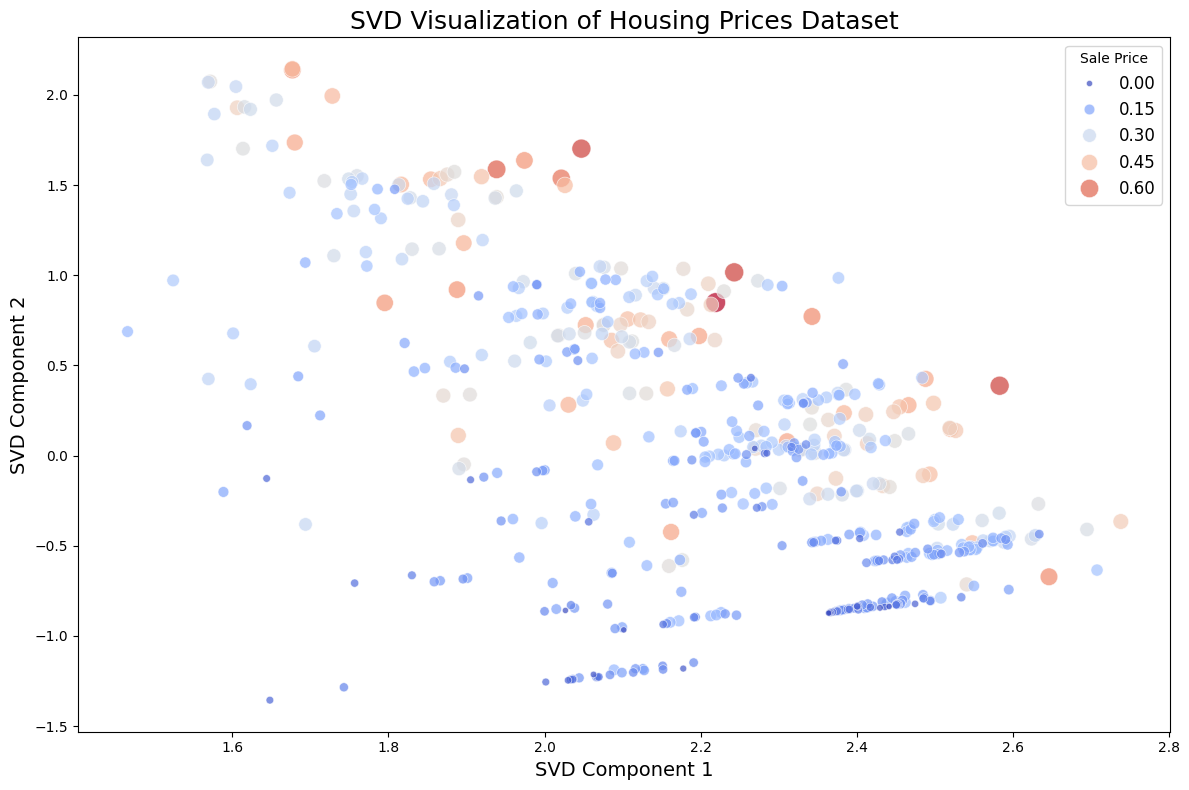

In [7]:
# Create a DataFrame for easy plotting
svd_df = pd.DataFrame(svd_result, columns=['SVD_1', 'SVD_2'])
svd_df['SalePrice'] = df['price']

# Plot the SVD visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(
    data=svd_df,
    x='SVD_1',
    y='SVD_2',
    hue='SalePrice',
    palette='coolwarm',
    size='SalePrice',
    sizes=(20, 200),
    alpha=0.7,
    marker='o'
)

# Customize the plot
plt.title('SVD Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('SVD Component 1', fontsize=14)
plt.ylabel('SVD Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


# Non Linear Dimensionatality Reduction

# TSNE (all features)

In [8]:
# Use t-SNE for dimensionality reduction (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


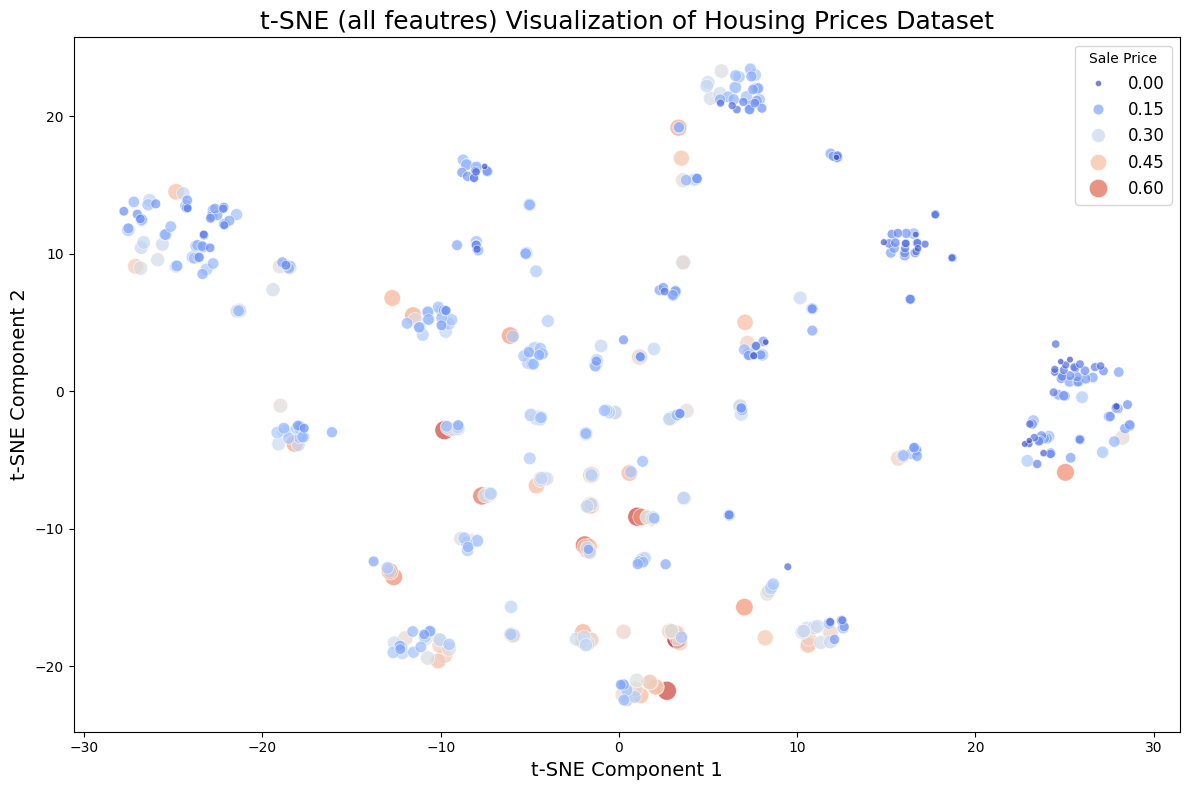

In [9]:
# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE_1', 'tSNE_2'])
tsne_df['SalePrice'] = y

# Plot the t-SNE visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(data=tsne_df, x='tSNE_1', y='tSNE_2', hue='SalePrice', palette='coolwarm', size='SalePrice', sizes=(20, 200), alpha=0.7, marker='o')

# Customize the plot
plt.title('t-SNE (all feautres) Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

# UMAP (all features)

In [10]:
!pip install umap-learn
import umap


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\samue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X)


C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


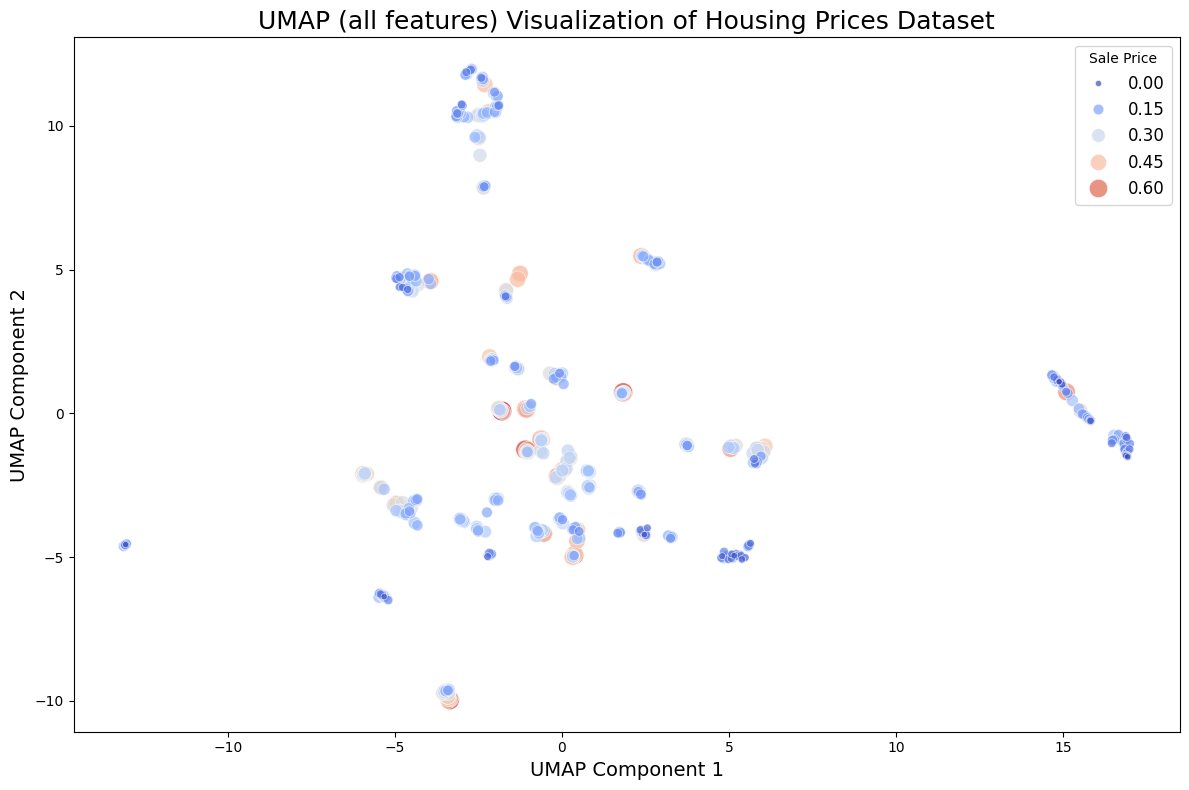

In [12]:
# Create a DataFrame for easy plotting
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
umap_df['SalePrice'] = df['price']

# Plot the UMAP visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(
    data=umap_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='SalePrice',
    palette='coolwarm',
    size='SalePrice',
    sizes=(20, 200),
    alpha=0.7,
    marker='o'
)

# Customize the plot
plt.title('UMAP (all features) Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


# tSNE (top 5 features)

In [13]:
# Select top 5 features
X_top5 = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

In [14]:
# Use t-SNE for dimensionality reduction (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_top5)

C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


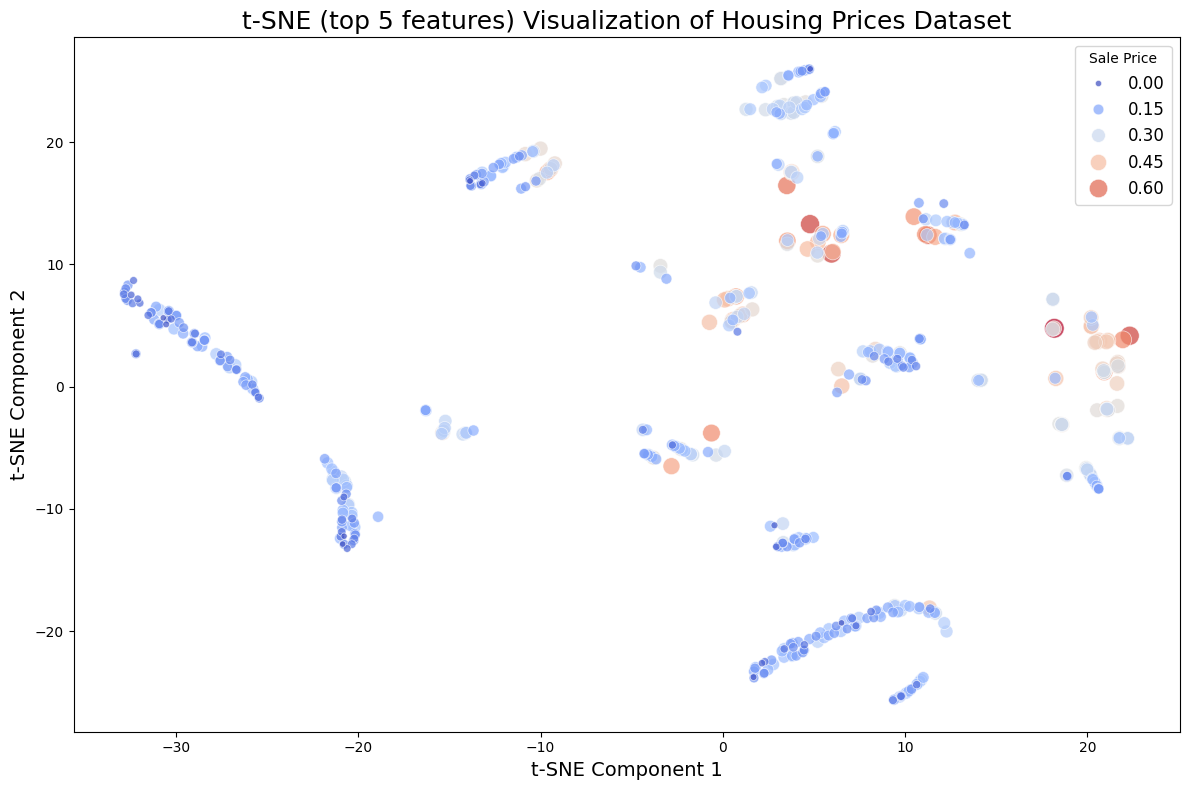

In [15]:
# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE_1', 'tSNE_2'])
tsne_df['SalePrice'] = y

# Plot the t-SNE visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(data=tsne_df, x='tSNE_1', y='tSNE_2', hue='SalePrice', palette='coolwarm', size='SalePrice', sizes=(20, 200), alpha=0.7, marker='o')

# Customize the plot
plt.title('t-SNE (top 5 features) Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

# UAMP (top 5 features)

In [16]:
# Select top 5 features
X_top5 = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]


In [17]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X_top5)


C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


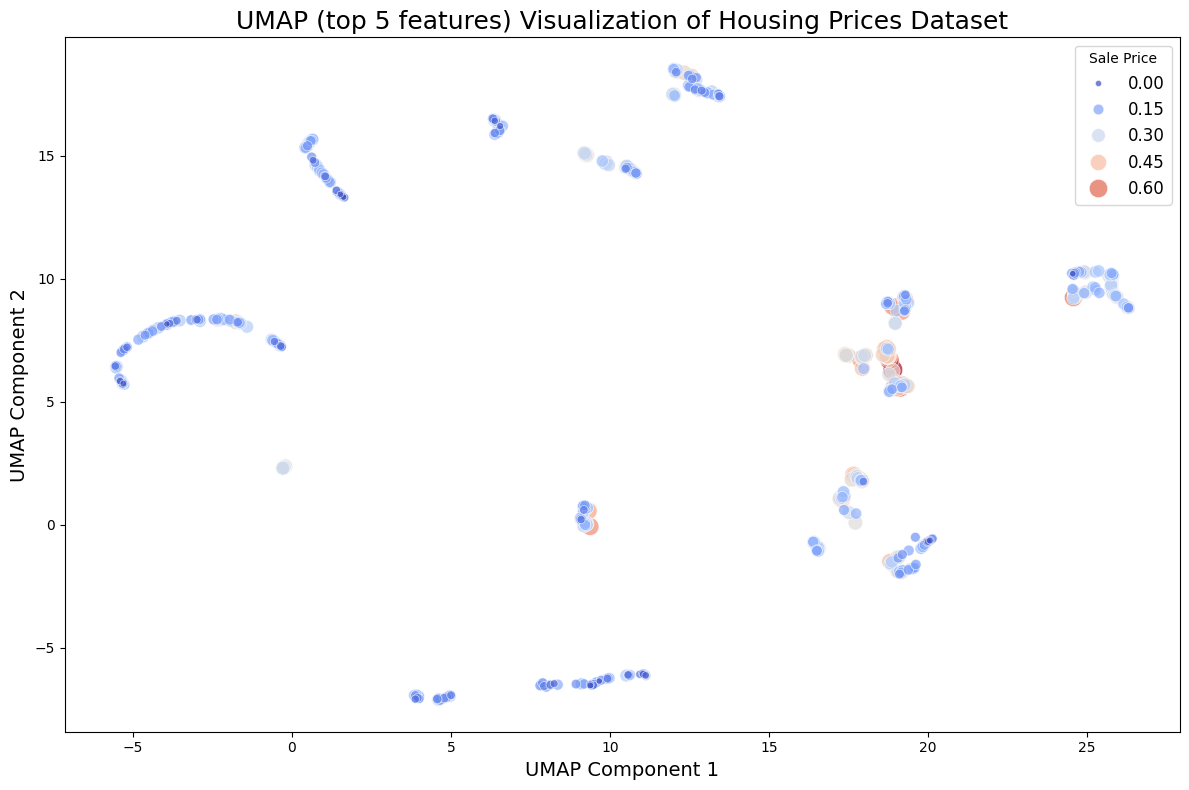

In [18]:
# Create a DataFrame for easy plotting
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
umap_df['SalePrice'] = df['price']

# Plot the UMAP visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(
    data=umap_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='SalePrice',
    palette='coolwarm',
    size='SalePrice',
    sizes=(20, 200),
    alpha=0.7,
    marker='o'
)

# Customize the plot
plt.title('UMAP (top 5 features) Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()